#Importing the Necessary libraries and reding our data

In [1]:
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  


In [25]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/california_housing_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/california_housing_test.csv')
df1.index.name = 'id'
df2.index.name = 'id'
frames = [df1,df2]
df = pd.concat(frames)

In [27]:
df.shape

(20000, 9)

### checking if our dataset has null or duplicated values or outliers

In [29]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [6]:
#sns.boxenplot(x=df)

In [21]:
df.head()

,longitude_x,latitude_x,housing_median_age_x,total_rooms_x,total_bedrooms_x,population_x,households_x,median_income_x,median_house_value_x,longitude_y,latitude_y,housing_median_age_y,total_rooms_y,total_bedrooms_y,population_y,households_y,median_income_y,median_house_value_y
id,,,,,,,,,,,,,,,,,,
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Data Visualization**


Text(0.5, 1.0, 'Heat Map for our Data')

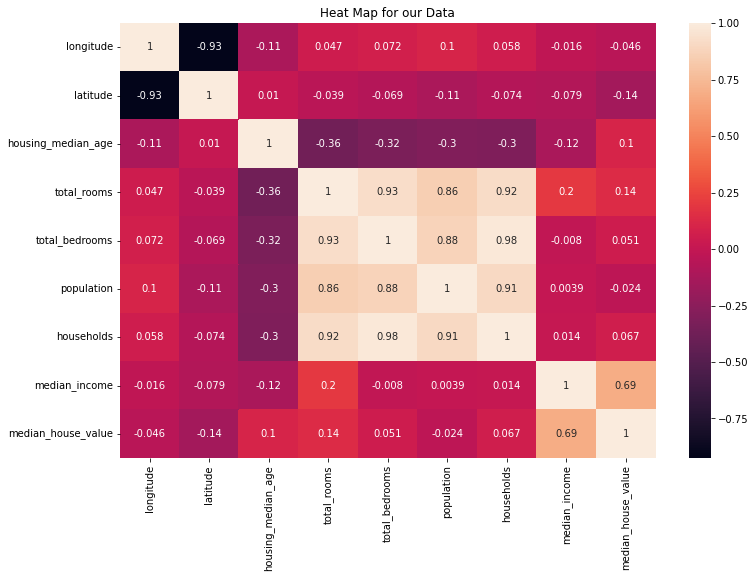

In [34]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True).set_title("Heat Map for our Data")


#### We noticed a strong correlation between "median_income" and "median_house_value"feature. We'll explore this features further.

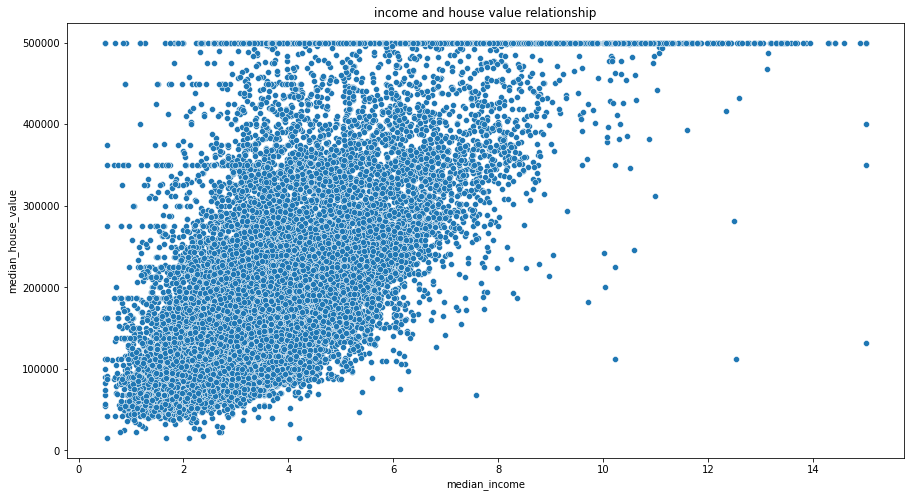

In [35]:
plt.figure(figsize=(15,8))
ax= sns.scatterplot(data=df, x="median_income", y="median_house_value").set_title("income and house value relationship")

### We noticed that there is a specific area where the price is high 

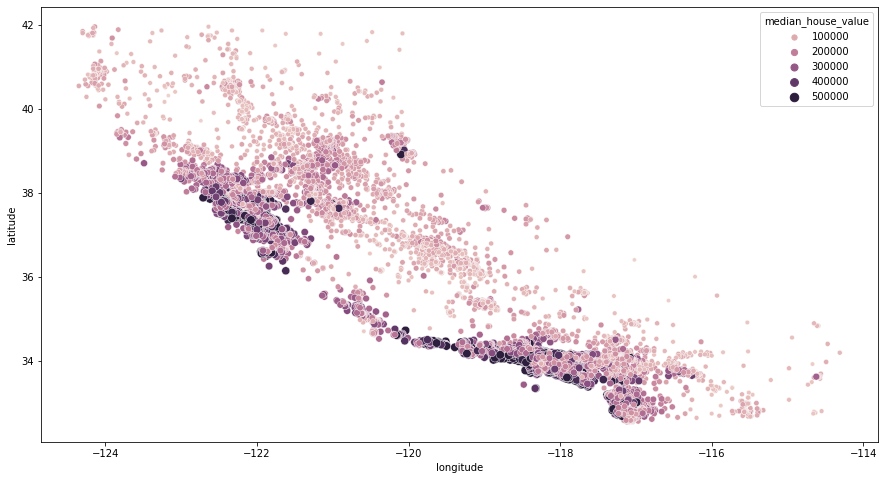

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="longitude", y="latitude", hue=df["median_house_value"], size=df["median_house_value"])

# Modeling and splitting our Data 

In [37]:
X = df.drop(columns=['median_house_value'])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
id,,,,,,,,
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895


In [38]:
Y =df[['median_house_value']]
Y

,median_house_value
id,
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0


###Splitting the data to train and test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, train_size=0.7)

In [40]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
id,,,,,,,,
6163,-118.24,34.22,34.0,1722.0,406.0,926.0,371.0,4.1523
2193,-115.57,32.80,33.0,1192.0,213.0,1066.0,211.0,4.5714
9534,-119.31,36.06,20.0,2236.0,434.0,1405.0,412.0,1.8827
6217,-118.24,33.95,21.0,1260.0,342.0,1167.0,310.0,0.9708
4458,-118.04,34.16,38.0,1594.0,249.0,633.0,247.0,5.9582
...,...,...,...,...,...,...,...,...
14948,-122.23,37.45,29.0,1617.0,235.0,758.0,246.0,7.7932
2894,-117.75,34.05,35.0,1293.0,339.0,1494.0,312.0,1.6645
3968,-117.96,33.80,30.0,729.0,131.0,488.0,139.0,4.7667


creating the model with 5 layers 

In [41]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model1.add(keras.layers.Dense(8, activation='relu'))
model1.add(keras.layers.Dense(4, activation='relu'))
model1.add(keras.layers.Dense(8, activation='relu'))
model1.add(keras.layers.Dense(1))
model1.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

fitting all the Variables to the model

In [42]:
model1.fit(X_train,y_train,epochs=200)

Epoch 1/200
438/438 [==============================] - 1s 2ms/step - loss: 47555047424.0000 - mean_squared_error: 47555047424.0000
Epoch 2/200
438/438 [==============================] - 1s 2ms/step - loss: 26050719744.0000 - mean_squared_error: 26050719744.0000
Epoch 3/200
438/438 [==============================] - 1s 2ms/step - loss: 25113466880.0000 - mean_squared_error: 25113466880.0000
Epoch 4/200
438/438 [==============================] - 1s 2ms/step - loss: 23995027456.0000 - mean_squared_error: 23995027456.0000
Epoch 5/200
438/438 [==============================] - 1s 2ms/step - loss: 22328696832.0000 - mean_squared_error: 22328696832.0000
Epoch 6/200
438/438 [==============================] - 1s 2ms/step - loss: 19955742720.0000 - mean_squared_error: 19955742720.0000
Epoch 7/200
438/438 [==============================] - 1s 2ms/step - loss: 16755939328.0000 - mean_squared_error: 16755939328.0000
Epoch 8/200
438/438 [==============================] - 1s 2ms/step - loss: 13668642

mean squared error score

In [48]:
y_predict1 =pd.DataFrame(model1.predict(X_test))
y_predict1
y_predict1.index.name='id'
y_test.index.name='id'
result = y_predict1.merge(y_test,on='id')
print(result)
mean_squared_error(y_test.values, y_predict1)

#1 score 7801424043  100 Epoch + 4 layers
#2 score 56298778834  200 Epoch + 5 layers
#3 score 5091037554  200 Epoch + 5 layers after the merge

                  0  median_house_value
id                                     
4     362794.375000             65500.0
6     295610.250000             82400.0
9     134154.500000            164200.0
12    146045.968750             48600.0
14    134159.984375             45000.0
...             ...                 ...
5961  262063.765625            166100.0
5963  324917.781250            159300.0
5972  176630.906250            162500.0
5973   95052.351562            118100.0
5978   78596.195312            117300.0

[2686 rows x 2 columns]


5091037554.929389

## we saw that our model not performing right for what we have so we choice the most columns effecting on the score of the model wich is the median_income, longitude,latitude.

In [44]:
#splitting feature "median_income"'longitude','latitude' to train set , and put "median_house_value" to test set
df_incomeX = df[['longitude','latitude','median_income']]
df_incomeY =df[['median_house_value']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_incomeX,df_incomeY, train_size=0.7)

In [46]:
df_incomeX

,longitude,latitude,median_income
id,,,
0,-114.31,34.19,1.4936
1,-114.47,34.40,1.8200
2,-114.56,33.69,1.6509
3,-114.57,33.64,3.1917
4,-114.57,33.57,1.9250
...,...,...,...
2995,-119.86,34.42,1.1790
2996,-118.14,34.06,3.3906
2997,-119.70,36.30,2.2895


creating the model with four layers 

In [58]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(4, activation='relu', input_shape=(3,)))
model2.add(keras.layers.Dense(2, activation='relu'))
model2.add(keras.layers.Dense(4, activation='relu'))
model2.add(keras.layers.Dense(1))
#optimizer=keras.optimizers.RMSprop(0.001)
model2.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')


Fitting three Variables: median_income , longitude , latitude  to the model

In [47]:
model2.fit(X_train1,y_train1,epochs=200)

Epoch 1/200
438/438 [==============================] - 1s 2ms/step - loss: 56282963968.0000 - mean_squared_error: 56282963968.0000
Epoch 2/200
438/438 [==============================] - 1s 2ms/step - loss: 56282832896.0000 - mean_squared_error: 56282832896.0000
Epoch 3/200
438/438 [==============================] - 1s 2ms/step - loss: 56282644480.0000 - mean_squared_error: 56282644480.0000
Epoch 4/200
438/438 [==============================] - 1s 2ms/step - loss: 56282464256.0000 - mean_squared_error: 56282464256.0000
Epoch 5/200
438/438 [==============================] - 1s 2ms/step - loss: 56282288128.0000 - mean_squared_error: 56282288128.0000
Epoch 6/200
438/438 [==============================] - 1s 2ms/step - loss: 56282116096.0000 - mean_squared_error: 56282116096.0000
Epoch 7/200
438/438 [==============================] - 1s 2ms/step - loss: 56281890816.0000 - mean_squared_error: 56281890816.0000
Epoch 8/200
438/438 [==============================] - 1s 2ms/step - loss: 56281759

mean squared error score

In [49]:
y_predict2 =pd.DataFrame(model2.predict(X_test1))
y_predict2

mean_squared_error(y_test1.values, y_predict2)
y_test1df=pd.DataFrame(y_test1)
y_test1df

y_predict2.index.name='id'
y_test1df.index.name='id'
result2 = y_predict2.merge(y_test1df,on='id')
print(result2)
mean_squared_error(y_test1df.values, y_predict2)


#1 score = 11517281200  100 Epoch + 3 layers
#2 score = 56469668862   200 Epoch + 4 layers


              0  median_house_value
id                                 
4     87.173355             65500.0
6     87.173355             82400.0
7     87.173355             48500.0
8     87.173355             58400.0
8     87.173355            194400.0
...         ...                 ...
5988  87.173355            126800.0
5990  87.173355            176100.0
5992  87.173355            162500.0
5996  87.173355            159700.0
5998  87.173355            160700.0

[2762 rows x 2 columns]


56090055301.167564

### we can save our model by using this code

In [51]:
#model1.save('Realtech_housing_prise.h5')

In [52]:
# if you want to load the model use this
#old_model = keras.models.load_model('Realtech_housing_prise.h5')

## this has a beter result but still not that great so we go with LinearRegression


# LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression

LinearRegression for all the data

In [53]:

reg = LinearRegression()
reg.fit(X_train,y_train)
reg_predict1= reg.predict(X_test)
mean_squared_error(y_test.values, reg_predict1)

4996463167.395699

LinearRegression for only the median_income, longitude,latitude

In [54]:

reg2 = LinearRegression()
reg2.fit(X_train1,y_train1)
reg_predict2= reg2.predict(X_test1)
mean_squared_error(y_test1.values,reg_predict2)

5217785573.466554

In [65]:
y_predict1

,0
id,
0,225257.671875
1,204380.968750
2,63602.566406
3,58173.269531
4,362794.375000
...,...
5995,399153.343750
5996,91652.851562
5997,229138.078125


In [60]:
sns.lineplot(y_predict1,y_test, index=)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
# = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/Realtech_housing_prise.h5')

In [ ]:
#df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/california_housing_test.csv')

In [ ]:
#o = df_test.drop(columns=['median_house_value'])
#p =df_test[['median_house_value']]